In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import the Dataset and examnine the couple rows of data.

In [5]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


The index column is not needed, so I deleted it and made the 'Rank' column the index column.

In [6]:
df.set_index("Rank", inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Examine the data.

In [7]:
df.shape

(16598, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In the New Data Set, look for any null values, then drop them for a more clear analysis.

In [9]:
df.isnull().sum()


Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()



Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Transform the Year column into an integer

In [11]:
df.Year = df.Year.astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int64  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


1. How Many Different Videogame Genres are there? List them and graph them with a countplot.


In [13]:
df['Genre'].value_counts()


Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

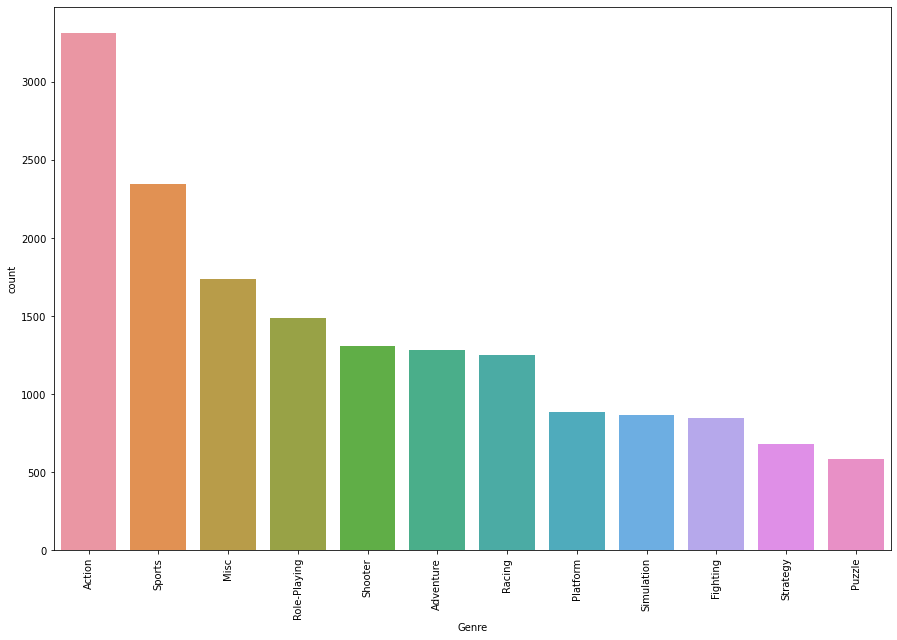

In [7]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order=df['Genre'].value_counts().index)
plt.xticks(rotation=90)


2. You see that Action is the most popular genre, you want to see what what is the highest selling game in North America.

In [14]:
df[df.NA_Sales == df.NA_Sales.max()]


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


3. What is the average sales in globally?

In [15]:
df['Global_Sales'].mean()


0.5409103185808628

4. Make a graph to find the year that had the highest game sales.

In [16]:
yearly_sales = df.groupby(by=['Year'])['Global_Sales'].sum()
print(yearly_sales)

Year
1980     11.38
1981     35.77
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    256.47
1999    251.27
2000    201.56
2001    331.47
2002    395.52
2003    357.85
2004    414.01
2005    458.51
2006    521.04
2007    609.92
2008    678.90
2009    667.30
2010    600.29
2011    515.80
2012    363.49
2013    368.11
2014    337.03
2015    264.44
2016     70.90
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '2009'),
  Text(1, 0, '2008'),
  Text(2, 0, '2010'),
  Text(3, 0, '2007'),
  Text(4, 0, '2011'),
  Text(5, 0, '2006'),
  Text(6, 0, '2005'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2012'),
  Text(11, 0, '2015'),
  Text(12, 0, '2014'),
  Text(13, 0, '2013'),
  Text(14, 0, '2001'),
  Text(15, 0, '1998'),
  Text(16, 0, '2000'),
  Text(17, 0, '2016'),
  Text(18, 0, '1999'),
  Text(19, 0, '1997'),
  Text(20, 0, '1996'),
  Text(21, 0, '1995'),
  Text(22, 0, '1994'),
  Text(23, 0, '1993'),
  Text(24, 0, '1981'),
  Text(25, 0, '1992'),
  Text(26, 0, '1991'),
  Text(27, 0, '1982'),
  Text(28, 0, '1986'),
  Text(29, 0, '1989'),
  Text(30, 0, '1983'),
  Text(31, 0, '1990'),
  Text(32, 0, '1987'),
  Text(33, 0, '1988'),
  Text(34, 0, '1985'),
  Text(35, 0, '1984'),


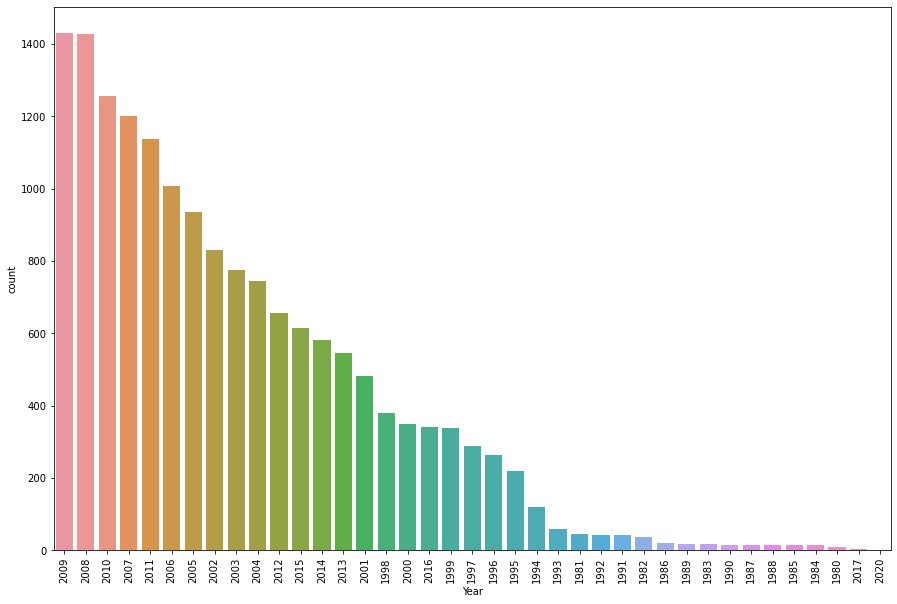

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df, order=df['Year'].value_counts().index)
plt.xticks(rotation=90)


5.Cross tab publisher and NA Sales

In [18]:
pd.crosstab(df['Publisher'], df['NA_Sales'])


NA_Sales,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,12.78,14.03,14.59,14.97,15.75,15.85,23.20,26.93,29.08,41.49
Publisher,,,,,,,,,,,,,,,,,,,,,
10TACLE Studios,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1C Company,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20th Century Fox Video Games,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D Boy,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3DO,0,1,2,2,3,2,4,2,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id Software,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
imageepoch Inc.,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
inXile Entertainment,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


6.Find the best selling console in North America.

In [19]:
NA_Platform = df.groupby(by=['Platform'])['NA_Sales'].sum()
NA_Platform = df.reset_index()
NA_Platform = df.sort_values(by=['Global_Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Wii'),
  Text(1, 0, 'NES'),
  Text(2, 0, 'GB'),
  Text(3, 0, 'DS'),
  Text(4, 0, 'X360'),
  Text(5, 0, 'PS3'),
  Text(6, 0, 'PS2'),
  Text(7, 0, 'SNES'),
  Text(8, 0, 'GBA'),
  Text(9, 0, '3DS'),
  Text(10, 0, 'PS4'),
  Text(11, 0, 'N64'),
  Text(12, 0, 'PS'),
  Text(13, 0, 'XB'),
  Text(14, 0, 'PC'),
  Text(15, 0, '2600'),
  Text(16, 0, 'PSP'),
  Text(17, 0, 'XOne'),
  Text(18, 0, 'GC'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'GEN'),
  Text(21, 0, 'DC'),
  Text(22, 0, 'PSV'),
  Text(23, 0, 'SAT'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'WS'),
  Text(26, 0, 'NG'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

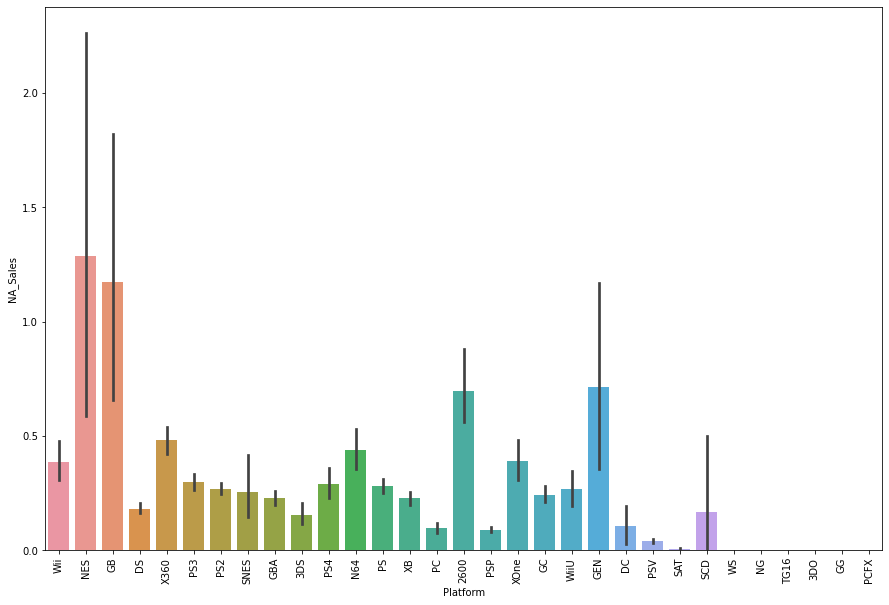

In [22]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="NA_Sales", data=df)
plt.xticks(rotation=90)

Compare the sales in the regions

In [36]:
Total_sales_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
Total_sales_region = Total_sales_region.sum().reset_index()
Total_sales_region = Total_sales_region.rename(columns={"index": "region", 0: "sale"})
Total_sales_region

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


([<matplotlib.patches.Wedge at 0x7fd5336bc6a0>,
 [Text(-1.0995946696115964, 0.029859044890360033, 'NA_Sales'),
  Text(0.7922706574673692, -0.7630905616741847, 'EU_Sales'),
  Text(0.9378314250625531, 0.5748671308790763, 'JP_Sales'),
  Text(0.30547029027007794, 1.056734546497991, 'Other_Sales')],
 [Text(-0.5997789106972343, 0.0162867517583782, '49.1%'),
  Text(0.4321476313458377, -0.4162312154586461, '27.3%'),
  Text(0.5115444136704835, 0.3135638895704052, '14.6%'),
  Text(0.1666201583291334, 0.5764006617261768, '9.0%')])

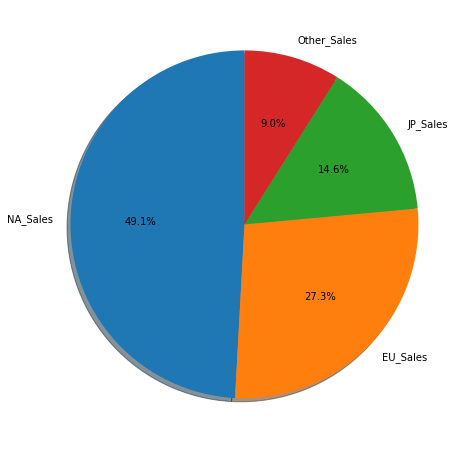

In [38]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)